<h1>Configure environment</h1>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy.matlib

<h1>Data preparation</h1>

In [2]:
# Model/data parameters
num_classes = 10
input_shape = (28, 28, 1)

# load the data and divide it into train/test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# scale images into the [0 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# make images with size (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11493376/11490434 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

<h1>Model definition</h1>

In [4]:
"""
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

# il modello piu piccolo si comporta come il classificatore random. ci sono 10 cifre, quindi accuratezza del 10% circa
model_smallest = keras.Sequential(
    [
      keras.Input(shape=input_shape),
      layers.MaxPooling2D(pool_size=(28, 28)),
      layers.Flatten(),
      layers.Dense(num_classes, activation="softmax")
    ]
)

model_smallest.summary()

"""

my_model = keras.Sequential(
    [
      keras.Input(shape=input_shape),
      layers.Conv2D(20, kernel_size=(5, 5), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(15, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(num_classes, activation="softmax")
    ]
)

my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        2715      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dropout (Dropout)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

<h1>Model training</h1>

In [5]:
def plot_history(network_history, n_epochs):
    x_plot = list(range(1,n_epochs+1))
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

In [6]:
batch_size = 128
epochs = 30

my_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
network_history = my_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5164 - accuracy: 0.8387 - val_loss: 0.1085 - val_accuracy: 0.9717
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1486 - accuracy: 0.9545 - val_loss: 0.0724 - val_accuracy: 0.9793
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1114 - accuracy: 0.9659 - val_loss: 0.0602 - val_accuracy: 0.9843
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0930 - accuracy: 0.9710 - val_loss: 0.0520 - val_accuracy: 0.9863
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9745 - val_loss: 0.0463 - val_accuracy: 0.9880
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9764 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9776 - val_loss: 0.0427 - val_accuracy: 0.9893
Epoch 

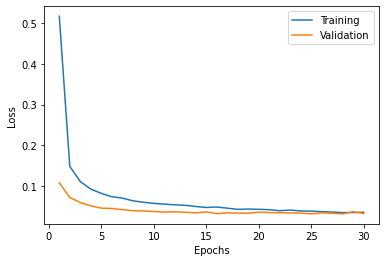

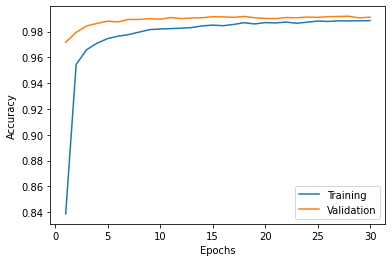

In [7]:
plot_history(network_history, epochs)

<h1>Evaluation of the model</h1>

In [8]:
score = my_model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0242 - accuracy: 0.9927
Test loss: 0.024208204820752144
Test accuracy: 0.9926999807357788


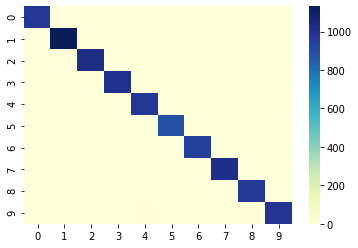

In [9]:
predictions = my_model.predict(x_test).argmax(axis=1)
ground_truth = y_test.argmax(axis=1)
cm = confusion_matrix(ground_truth, predictions)

sn.heatmap(cm, cmap="YlGnBu")
plt.show()